# Create Dataset

### 폰트 경로 확인

In [1]:
import os
import shutil
from tqdm import tqdm

from PIL import Image,ImageDraw,ImageFont
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# check path
path = '/Users/youngerous/Desktop/git repos/FontStyler/src/data/fonts/'
os.listdir(path)

['Monospace',
 'Serif',
 'Handwriting',
 'Sans Serif',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 'Display']

In [5]:
# font storage
dict_font = {
    'Serif': [],
    'Sans Serif': [],
    'Display': [],
    'Handwriting': [],
    'Monospace': []
}

save_path = '/Users/youngerous/Desktop/git repos/FontStyler/src/data/selected/'

### Regular Font 추출

In [9]:
categories = ['Serif', 'Sans Serif', 'Display', 'Handwriting', 'Monospace']
exclude = ['.DS_Store', '.ipynb_checkpoints' ]

for category in tqdm(categories):
    ## 각 카테고리 접근
    style_dir = path + category + '/'
    for files in os.listdir(style_dir):
        if (files in exclude) or ('.zip' in files):
            continue

        ## 4개씩 분할된 폴더 접근
        file_dir = style_dir + files + '/'
        for fontfolder in os.listdir(file_dir):
            if fontfolder in exclude:
                continue

            ## 세부 폰트 파일 접근
            font_dir = file_dir + fontfolder + '/'
            for font in os.listdir(font_dir):
                if 'Regular' in font:
                    dict_font[category].append(font)
                    shutil.copy(font_dir+font, save_path + category +'/'+font)

100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


In [10]:
# 총 몇 개의 파일을 추출했는가
print(len(dict_font['Serif']))
print(len(dict_font['Sans Serif']))
print(len(dict_font['Display']))
print(len(dict_font['Handwriting']))
print(len(dict_font['Monospace']))

182
263
285
140
19


폰트마다, 그리고 알파벳마다 이미지를 수집해보자.

In [30]:
# user settings: 소문자 a~z, 대문자 A~Z 순
words = [chr(i) for i in range(ord('a'),ord('z')+1)] + [chr(i) for i in range(ord('A'), ord('Z')+1)]
canvas_size = 256

In [31]:
def save_font_word(word, canvas_size, font_style, file_name, cate):
    canvas = Image.new('L', (canvas_size, canvas_size), color=255)
    draw = ImageDraw.Draw(canvas)
    
    font_style = './selected/'+ cate + '/' + font_style
    try:
        font = ImageFont.truetype(font_style, size=150)
        w, h = draw.textsize(word, font=font)    
        draw.text(((canvas_size-w)/2,(canvas_size-h)/5), word, fill=(0), font=font)

        canvas.save(file_name, "PNG")
    except Exception as e:
        print(font_style + '(' + word + ')' + ' : ' + str(e))

### 폰트 이미지 수집 코드

In [35]:
# Serif (0)
for (idx,style) in enumerate(dict_font['Serif']):
    for (jdx,word) in enumerate(words):
        filename = './img/0/0_{}_{}.png'.format(idx, jdx)
        save_font_word(word, canvas_size, style, filename, 'Serif')

In [37]:
# Sans Serif (1)
for (idx,style) in enumerate(dict_font['Sans Serif']):
    for (jdx,word) in enumerate(words):
        filename = './img/1/1_{}_{}.png'.format(idx, jdx)
        save_font_word(word, canvas_size, style, filename, 'Sans Serif')

In [47]:
# Display (2)
for (idx,style) in enumerate(dict_font['Display']):
    for (jdx,word) in enumerate(words):
        filename = './img/2/2_{}_{}.png'.format(idx, jdx)
        save_font_word(word, canvas_size, style, filename, 'Display')

./selected/Display/KumarOneOutline-Regular.ttf(a) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(b) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(c) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(d) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(e) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(f) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(g) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(h) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(i) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(j) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(k) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(l) : execution context too long
./selected/Display/KumarOneOutline-Regular.ttf(m) : 

> 카테고리 2(Display)에서 2개의 폰트 배제

In [48]:
# Handwriting (3)
for (idx,style) in enumerate(dict_font['Handwriting']):
    for (jdx,word) in enumerate(words):
        filename = './img/3/3_{}_{}.png'.format(idx, jdx)
        save_font_word(word, canvas_size, style, filename, 'Handwriting')

In [32]:
# Monospace (4)
for (idx,style) in enumerate(dict_font['Monospace']):
    for (jdx,word) in enumerate(words):
        filename = './img/4/4_{}_{}.png'.format(idx, jdx)
        save_font_word(word, canvas_size, style, filename, 'Monospace')

#### 각 카테고리별 폰트 개수 최종 확인
- 카테고리 2에서 두 개의 폰트를 배제했음을 고려
- 카테고리 폴더마다 readme를 추가하였으므로 이를 고려

In [43]:
print( '카테고리 0 폰트 갯수: ', (len(os.listdir('./img/0'))-1) / 52 )
print( '카테고리 1 폰트 갯수: ', (len(os.listdir('./img/1'))-1) / 52 )
print( '카테고리 2 폰트 갯수: ', (len(os.listdir('./img/2'))-1) / 52 )
print( '카테고리 3 폰트 갯수: ', (len(os.listdir('./img/3'))-1) / 52 )
print( '카테고리 4 폰트 갯수: ', (len(os.listdir('./img/4'))-1) / 52 )

카테고리 0 폰트 갯수:  182.0
카테고리 1 폰트 갯수:  263.0
카테고리 2 폰트 갯수:  283.0
카테고리 3 폰트 갯수:  140.0
카테고리 4 폰트 갯수:  19.0


---
### 이미지를 obj 확장자로 변환 

#### 두 가지 버전을 만들 예정
1. train/val split을 하지 않은 **전체 obj 파일**
    → 추후 비율 조절을 쉽게 하기 위함
2. 만약의 상황을 대비하여 **train/val split(0.1)을 실행**한 obj 파일

In [28]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random
import torch

def pickle_examples_integrated(from_dir, train_path):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png')) # 카테고리 폴더 내 모든 png 파일
    with open(train_path, 'wb') as ft:
        train_count = 0
        
        for p in paths:
            label = os.path.basename(p) # 파일 이름을 저장(추후 DataSet에서 분리)
            with open(p, 'rb') as f:
                img_bytes = f.read()
                r = random.random()
                example = (label, img_bytes)
                
                # pickle.dump(example, ft)
                torch.save(example, ft)
                train_count += 1
    print('{} imgs saved in train.obj, end'.format(train_count))
    return

def pickle_examples_separated(from_dir, train_path, val_path, train_val_split=0.1):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png'))
    with open(train_path, 'wb') as ft:
        with open(val_path, 'wb') as fv:
            train_count, val_count = 0, 0
            
            for p in paths:
                label = os.path.basename(p)
                with open(p, 'rb') as f:
                    img_bytes = f.read()
                    r = random.random()
                    example = (label, img_bytes)
                    
                    if r < train_val_split:
                        # pickle.dump(example, fv)
                        torch.save(example, fv)
                        val_count += 1
                    else:
                        # pickle.dump(example, ft)
                        torch.save(example, ft)
                        train_count += 1
    print('{} imgs saved in train.obj, end'.format(train_count))
    print('{} imgs saved in val.obj, end'.format(val_count))
    return

#### Integrated 버전
'integrated' 폴더에 'train_{카테고리}.obj' 파일이 생성된다.

In [29]:
save_dir_integrated = './dataset/integrated/'

for i in tqdm(range(5)):
    from_dir = './img/{}/'.format(str(i))
    train_path = os.path.join(save_dir_integrated, 'train_{}.obj'.format(str(i)))
    
    pickle_examples_integrated(from_dir, train_path)

 20%|██        | 1/5 [00:03<00:12,  3.20s/it]

9464 imgs saved in train.obj, end


 40%|████      | 2/5 [00:07<00:10,  3.57s/it]

13676 imgs saved in train.obj, end


 60%|██████    | 3/5 [00:12<00:07,  3.94s/it]

14716 imgs saved in train.obj, end


 80%|████████  | 4/5 [00:14<00:03,  3.42s/it]

7280 imgs saved in train.obj, end


100%|██████████| 5/5 [00:14<00:00,  2.47s/it]

988 imgs saved in train.obj, end


#### Separated 버전
'separated' 폴더에 'train_{카테고리}.obj' 파일과 'val_{카테고리}.obj' 파일이 생성된다.

In [30]:
save_dir_separated = './dataset/separated/'

for i in tqdm(range(5)):
    from_dir = './img/{}/'.format(str(i))
    train_path = os.path.join(save_dir_separated, 'train_{}.obj'.format(str(i)))
    val_path = os.path.join(save_dir_separated, 'val_{}.obj'.format(str(i)))
    
    pickle_examples_separated(from_dir, train_path, val_path)

 20%|██        | 1/5 [00:00<00:02,  1.43it/s]

8556 imgs saved in train.obj, end
908 imgs saved in val.obj, end


 40%|████      | 2/5 [00:01<00:02,  1.24it/s]

12321 imgs saved in train.obj, end
1355 imgs saved in val.obj, end


 60%|██████    | 3/5 [00:02<00:01,  1.12it/s]

13219 imgs saved in train.obj, end
1497 imgs saved in val.obj, end


100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

6604 imgs saved in train.obj, end
676 imgs saved in val.obj, end
884 imgs saved in train.obj, end
104 imgs saved in val.obj, end


---
obj 데이터가 잘 불러와지는 지 확인하자.

In [31]:
example_dir = './dataset/integrated/'
os.listdir(example_dir)

['.DS_Store',
 'train_1.obj',
 'train_0.obj',
 'train_2.obj',
 'train_3.obj',
 'train_4.obj']

In [32]:
from common.dataset import PickledImageProvider

In [33]:
sample = PickledImageProvider(example_dir+'train_3.obj')

processed 1000 examples
processed 2000 examples
processed 3000 examples
processed 4000 examples
processed 5000 examples
processed 6000 examples
processed 7000 examples
processed 8000 examples
processed 9000 examples
processed 10000 examples
processed 11000 examples
processed 12000 examples
processed 13000 examples
processed 14000 examples
processed 15000 examples
processed 16000 examples
processed 17000 examples
processed 18000 examples
processed 19000 examples
processed 20000 examples
processed 21000 examples
processed 22000 examples
processed 23000 examples
processed 24000 examples
processed 25000 examples
processed 26000 examples
processed 27000 examples
processed 28000 examples
processed 29000 examples
processed 30000 examples
processed 31000 examples
processed 32000 examples
processed 33000 examples
processed 34000 examples
processed 35000 examples
processed 36000 examples
unpickled total 36400 examples
saved total 7280 examples only for byte


In [34]:
len(sample.examples) 

7280

In [38]:
sample.examples[0] # (파일명, byte) 형태

('3_31_11.png',
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x01\x00\x08\x00\x00\x00\x00y\x19\xf7\xba\x00\x00\x05\xc9IDATx\x9c\xed\x9d]h\xd5u\x18\xc7\x7f\xc7\xb4\x95\xa9[!HN\x88\x95$\xa2\xa9\xc1nF\x91\x17\x8d(\xa2ZwA\x17\x13B\x19\x81\x84P\x17\xa5\x1b\x85\xdd\xf4J\xd0\x0bDe\t\xb5 \xb27\xb0\xe8FH{\x15\x07\xa2\xc1\x88Y\xa6I\xaf\x8b\\\x8b5\xdd\xcb\xe9"\xcd\xd5\xf3\xfcv\xceE\xbf\xef\xf7\xc0\xf3\xfd\\\xed<\xfb\xc3\xf3=\x1f\x9e\xff\x7f\xff\x97\x9d\xf3\xabTSl\xe6\xb0\x03\xb0\x91\x00v\x006\x12\xc0\x0e\xc0F\x02\xd8\x01\xd8H\x00;\x00\x1b\t`\x07`#\x01\xec\x00l$\x80\x1d\x80\x8d\x04\xb0\x03\xb0\x91\x00v\x006\x12\xc0\x0e\xc0F\x02\xd8\x01\xd8H\x00;\x00\x1b\t`\x07`#\x01\xec\x00l$\x80\x1d\x80\x8d\x04\xb0\x03\xb0\x91\x00v\x006\x12\xc0\x0e\xc0F\x02\xd8\x01\xd8H\x00;\x00\x1b\t`\x07`#\x01\xec\x00l$\x80\x1d\x80\x8d\x04\xb0\x03\xb0\x99\x8bmw\xfa\xe0\xe0\xf1\x91\xea\xc5\x97u,\xc7\xf6\xcd\x83\x14\xf0\xdb\xeb\xef~t\xea\xcc\xcf\xed\x0f\xdc\x0e\xec<\x0b\x15\xd8g\x86\xf6\xbc\xf4\xd6\xf8\xcc\xd7\xd

In [35]:
import io

sample_img = sample.examples[1][1]
img = Image.open(io.BytesIO(sample_img))

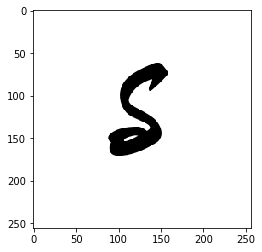

In [36]:
plt.imshow(img, cmap='gray')
plt.show()

### 샘플 출력 (Handwriting)

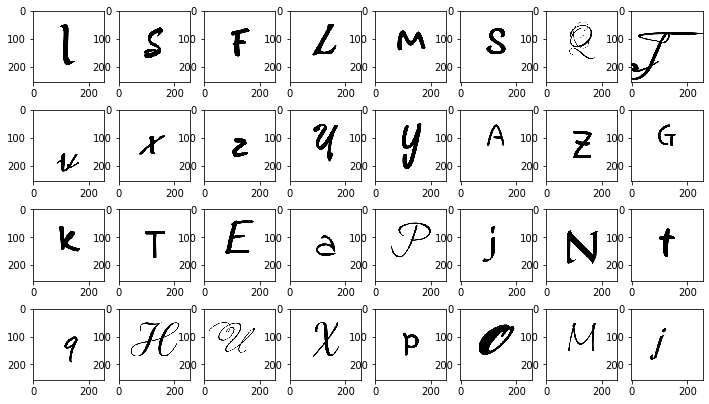

In [37]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(sample.examples[:32]):
    plt.subplot(4, 8, idx+1)
    plt.imshow(Image.open(io.BytesIO(sample.examples[idx][1])), cmap='gray')
plt.show()